#Making Vector Field Plots with Python

Making a 2-D vector field (or “quiver”) plot is somewhat similar to making a contour plot because the vectors must be calculated on a grid. This type of plot is most useful when the vectors do not have a third component.  
The first step is to find the Cartesian components of the field to be plotted. The example program will plot the magnetic field of a long wire along <i>z</i> axis carrying a current of <i>I</i> = 50 A in the +<i>z</i> direction. In cylindrical coordinates, the magnetic field is  

$$ \vec{B} = \frac{\mu_0 I}{2\pi s}\hat{\theta}, $$  
where <i>s</i> is the distance from the wire and $\mu_0 I/2\pi = 1 \rm{\ mT\cdot cm}$. If distances are in centimeters, the magnetic field is in mT.

<center><img src="https://drive.google.com/uc?id=17sFsKz7a1k1kkAbhnCEcF45sc1u4fzlK" width=250> </center>

From the diagram above, the Cartesian components are  

$$
\vec{B} = \frac{\mu_0 I}{2\pi s}\left(-\sin\theta\hat{x}+\cos\theta\hat{y}\right)
= \frac{\mu_0 I}{2\pi}\frac{1}{s}\left(-\frac{y}{s}\hat{x}+\frac{x}{s}\hat{y}\right)
= \frac{\mu_0 I}{2\pi}\left(-\frac{y}{s^2}\hat{x}+\frac{x}{s^2}\hat{y}\right),
$$  
where $s^2=x^2+y^2$.  
  
The meshgrid command is used to make the two grids where **`X`** and **`Y`** which contain the <i>x</i> and <i>y</i> coordinates for each point. Two additional grids (called **`Bx`** and **`By`** in the example program) are filled with the values of the <i>x</i> and <i>y</i> components of the vector.  
  
The **`quiver`** command from the pylab library makes the 2-D vector field plot, which is assigned the name **`QP`** in the example program below.  
  
The **`quiverkey`** command adds a “key” which shows the scale for the lengths of the vectors in the plot. The first argument (**`QP`**) is the name of the plot. The second and third arguments give the position of the key in the horizontal and vertical directions from the lower, right corner as fractions of the size of the plot. The “1.1” places the key above the plot, which makes it easier to see. The fourth and fifth arguments are the length of the vector and its text label. The final argument is for the placement of the label (**`N`** = above, **`S`** = below, **`W`** = left, and **`E`** = right).  
  
The **`axis`** command is used to set the left, right, bottom, and top limits (in that order) of the axes. It helps to extend the axes beyond the limits of the grid to make room for the vectors near the edges.

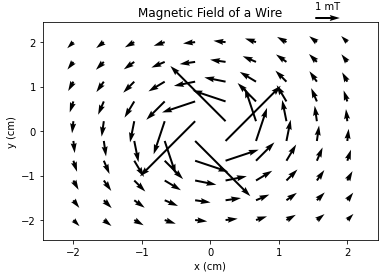

In [1]:
import pylab as pl
# Set limits and number of points in grid
xmax = 2.0
xmin = -xmax
NX = 10
ymax = 2.0
ymin = -ymax
NY = 10
# Make grid and calculate vector components
x = pl.linspace(xmin, xmax, NX)
y = pl.linspace(ymin, ymax, NY)
X, Y = pl.meshgrid(x, y)
S2 = X**2 + Y**2 # This is the radius squared
Bx = -Y/S2
By = +X/S2
pl.figure()
QP = pl.quiver(X,Y,Bx,By)
pl.quiverkey(QP, 0.85, 1.02, 1.0, '1 mT', labelpos='N')
# Set the left, right, bottom, top limits of axes
dx = (xmax - xmin)/(NX - 1) # One less gap than points
dy = (ymax - ymin)/(NY - 1)
pl.axis([xmin-dx, xmax+dx, ymin-dy, ymax+dy])
pl.title('Magnetic Field of a Wire')
pl.xlabel('x (cm)')
pl.ylabel('y (cm)')
pl.show()

##Additional Documentation

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html